# Celeste Database Exploration

In [30]:
import json
import os
import pandas as pd
import numpy as np

### 1 - Room sizes distribution

So that we kinda have a better idea of what size of room we should generate in the Cskeleton

In [60]:
directory = "../levels/"

l_filenames_fg = []

for folder in os.scandir(directory):
    for filename in os.scandir(folder.path):
        if filename.path.endswith("fg.csv"):
            l_filenames_fg.append(filename.path)

l_data = []
for file in l_filenames_fg:
    lvl_name, room_name = file.split("/")[-2:]
    height, width = pd.read_csv(file, sep=";", header=None).shape
    l_data.append((lvl_name, room_name, width, height))

df_size_rooms = pd.DataFrame(l_data, columns=["level", "room", "width", "height"])
df_size_rooms["size"] = list(zip(df_size_rooms["width"], df_size_rooms["height"]))
df_size_rooms["unique_comb_width"] = [df_size_rooms[df_size_rooms.width == w].height.unique().size for w in df_size_rooms.width]
df_size_rooms["unique_comb_height"] = [df_size_rooms[df_size_rooms.height == h].width.unique().size for h in df_size_rooms.height]
df_size_rooms["unique_comb_coords"] = df_size_rooms["size"].map(lambda x: df_size_rooms["size"].value_counts()[x])
df_size_rooms["filepath"] = "../levels/"+df_size_rooms["level"]+"/"+df_size_rooms["room"]
df_size_rooms["room"] = df_size_rooms["room"].map(lambda x: x.split("_fg")[0])

In [62]:
df_size_rooms.to_csv("room_data_celeste.csv", sep=";", decimal=",", encoding="utf-8")

In [61]:
df_size_rooms

,level,room,width,height,size,unique_comb_width,unique_comb_height,unique_comb_coords,filepath
0,8-Epilogue,lvl_outside,40,23,"(40, 23)",84,136,169,../levels/8-Epilogue/lvl_outside_fg.csv
1,8-Epilogue,lvl_inside,40,23,"(40, 23)",84,136,169,../levels/8-Epilogue/lvl_inside_fg.csv
2,8-Epilogue,lvl_bridge,126,23,"(126, 23)",1,136,3,../levels/8-Epilogue/lvl_bridge_fg.csv
3,8-Epilogue,lvl_secret,40,23,"(40, 23)",84,136,169,../levels/8-Epilogue/lvl_secret_fg.csv
4,7H-Summit,lvl_f-01,114,23,"(114, 23)",2,136,4,../levels/7H-Summit/lvl_f-01_fg.csv
...,...,...,...,...,...,...,...,...,...
819,3-CelestialResort,lvl_09-d,40,46,"(40, 46)",84,5,7,../levels/3-CelestialResort/lvl_09-d_fg.csv
820,3-CelestialResort,lvl_13-b,40,23,"(40, 23)",84,136,169,../levels/3-CelestialResort/lvl_13-b_fg.csv
821,3-CelestialResort,lvl_00-a,80,23,"(80, 23)",6,136,11,../levels/3-CelestialResort/lvl_00-a_fg.csv
822,3-CelestialResort,lvl_12-y,40,23,"(40, 23)",84,136,169,../levels/3-CelestialResort/lvl_12-y_fg.csv


Store names of the 40 x 23 rooms

In [135]:
df_size_rooms[df_size_rooms["size"]==(40, 23)]["filepath"].map(lambda x: x.replace("_fg.csv", "_entities.json"))

0         ../levels/8-Epilogue/lvl_outside_entities.json
1          ../levels/8-Epilogue/lvl_inside_entities.json
3          ../levels/8-Epilogue/lvl_secret_entities.json
45               ../levels/9-Core/lvl_b-00_entities.json
54                 ../levels/9-Core/lvl_0x_entities.json
                             ...                        
817    ../levels/3-CelestialResort/lvl_01-b_entities....
818    ../levels/3-CelestialResort/lvl_07-b_entities....
820    ../levels/3-CelestialResort/lvl_13-b_entities....
822    ../levels/3-CelestialResort/lvl_12-y_entities....
823    ../levels/3-CelestialResort/lvl_10-c_entities....
Name: filepath, Length: 169, dtype: object

In [136]:
l_fp_main_rooms = df_size_rooms[df_size_rooms["size"]==(40, 23)]["filepath"].map(lambda x: x.replace("_fg.csv", "_entities.json")).to_list()

In [22]:
df_size_rooms["size"].value_counts()

size
(40, 23)      169
(80, 23)       11
(47, 23)       10
(54, 23)       10
(40, 25)        8
             ... 
(244, 23)       1
(117, 23)       1
(170, 116)      1
(94, 47)        1
(44, 60)        1
Name: count, Length: 375, dtype: int64

In [23]:
df_size_rooms.groupby(["size", "level"])["size"].value_counts()

size        level          
(40, 23)    0-Intro             3
            1-ForsakenCity     18
            1H-ForsakenCity     3
            2-OldSite          15
            2H-OldSite          2
                               ..
(334, 23)   LostLevels          1
(362, 158)  LostLevels          1
(451, 25)   7X-Summit           1
(659, 23)   9X-Core             1
(768, 340)  LostLevels          1
Name: count, Length: 597, dtype: int64

In [24]:
df_scatter = df_size_rooms["size"].value_counts().reset_index()
df_scatter["w"] = df_scatter["size"].map(lambda x: x[0])
df_scatter["h"] = df_scatter["size"].map(lambda x: x[1])
df_scatter = df_scatter.drop("size", axis=1)
df_scatter

,count,w,h
0,169,40,23
1,11,80,23
2,10,47,23
3,10,54,23
4,8,40,25
...,...,...,...
370,1,244,23
371,1,117,23
372,1,170,116
373,1,94,47


<Axes: xlabel='w', ylabel='h'>

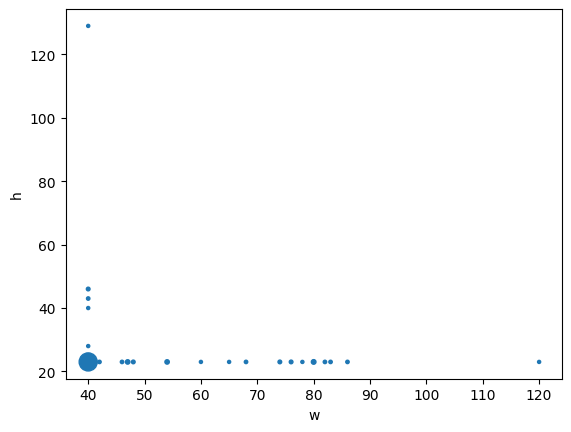

In [25]:
df_scatter[df_scatter["count"] >= 5].plot.scatter("w", "h", "count")

169 rooms have the same size: (40, 23) $\longrightarrow$ Training dataset

1st step: adapt skeleton to work only with 40 $\times$ 23 rooms and generate such rooms using training dataset.
- Will it be enough training data? Only 169 rooms out of 820ish

### 2 - Entities distribution

How to detect entities?

In [88]:
directory = "../levels/"

l_filenames_entities = []

for folder in os.scandir(directory):
    for filename in os.scandir(folder.path):
        if filename.path.endswith("entities.json"):
            l_filenames_entities.append(filename.path)

df_entities = pd.DataFrame()
for name in l_filenames_entities:
    df_temp = pd.read_json(name)
    df_temp["room_name"] = name
    df_temp["level"] = name.split("/")[2]
    df_temp["room"] = name.split("/")[-1].split("_entities")[0]
    df_entities = pd.concat([df_entities, df_temp])
df_entities.reset_index(drop=True, inplace=True)

In [89]:
df_entities.to_csv("table_entities_per_room_celeste.csv", sep=";", decimal=",", encoding="utf-8")

In [94]:
df_entities["__name"].unique()

array(['player', 'flutterbird', 'invisibleBarrier', 'lamp', 'bridgeFixed',
       'npc', 'bird', 'wire', 'wallSpringLeft', 'trackSpinner', 'spinner',
       'rotateSpinner', 'touchSwitch', 'movingPlatform', 'spring',
       'switchGate', 'door', 'triggerSpikesLeft', 'soundSource',
       'jumpThru', 'fallingBlock', 'spikesUp', 'spikesLeft',
       'spikesRight', 'towerviewer', 'dreamBlock', 'hanginglamp',
       'checkpoint', 'zipMover', 'spikesDown', 'summitcheckpoint',
       'refill', 'crumbleBlock', 'killbox', 'cloud', 'badelineBoost',
       'fakeWall', 'SummitBackgroundManager', 'swapBlock', 'booster',
       'cassetteBlock', 'blackGem', 'cliffside_flag', 'wallSpringRight',
       'moveBlock', 'goldenBerry', 'risingLava', 'coreModeToggle',
       'fireBall', 'fireBarrier', 'bounceBlock', 'wallBooster',
       'bigSpinner', 'iceBlock', 'exitBlock', 'sandwichLava', 'dashBlock',
       'strawberry', 'coreMessage', 'starJumpBlock', 'cassette',
       'heartGemDoor', 'introCar', 'infi

In [123]:
default_entity_map = {
    "spikesUp": "^",
    "spikesLeft": "<",
    "spikesDown": "v",
    "spikesRight": ">",
    "player": "P",
    "dreamBlock": "D",
    "crumbleBlock": "C",
    "jumpThru": "_",
    "greenBooster": "O",
    "redBooster": "Q",
    "water": "W",
    "spinner": "S",
    "bumper": "B",
    "refill": "R",
    "feather": "F",
    "lightbeam": "L",
}

l_main_entities = list(default_entity_map.keys())

In [126]:
df_entities_main = df_entities.loc[df_entities["__name"].isin(l_main_entities), :]

In [140]:
df_entities_main_rooms_40_23 = df_entities_main[df_entities_main["room_name"].isin(l_fp_main_rooms)]

In [148]:
df_entities.groupby("room_name").count()["__name"].to_csv("nb_entities_per_room.csv")

In [150]:
df_entities.groupby("room_name").count()["__name"][df_entities.groupby("room_name").count()["__name"] > 500]

room_name
../levels/6-Reflection/lvl_b-02_entities.json     529
../levels/7-Summit/lvl_g-01_entities.json        1190
../levels/7-Summit/lvl_g-03_entities.json         672
../levels/7H-Summit/lvl_g-01_entities.json       1060
../levels/7H-Summit/lvl_g-02_entities.json        642
../levels/7X-Summit/lvl_03_entities.json          705
../levels/LostLevels/lvl_g-06_entities.json      1318
../levels/LostLevels/lvl_h-10_entities.json       898
../levels/LostLevels/lvl_j-16_entities.json      1257
../levels/LostLevels/lvl_j-19_entities.json       757
Name: __name, dtype: int64

## NEED function to display room with fn

In [151]:
def display_room_celeste(lvl_name, room_name):
    """
    Displays room just like in Ahorn? Have a look at Ahorn source code/ask Cruor?
    """
    raise NotImplementedError